# Descriptive Analysis

- Size
- Missingness
- Shape
- Central Tendency
- Variability

<div class="alert alert-success">
The goal of a <b>descriptive analysis</b> is to understand and summarize information about the variables stored in your dataset.
</div>

### Setup

The packages and settings we'll use in this workbook:

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 7) #increase figure size

import seaborn as sns
sns.set(style='white', font_scale=2) #set style

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import uniform, norm, bernoulli, poisson

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

### The Data

To walk through these concepts today, we're going to use data from mammalian sleep patterns.

In [7]:
df = pd.read_csv('data/msleep.csv') 
df.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000


## Size

As discussed previously, knowing and checking the size of your data helps you:
- understand what information you have
- know if it read into Python correctly
- determine what analyses are appropriate

In [8]:
# determine rows and columns in df
df.shape

(83, 11)

We now know that we have information about 83 mammals with information from 11 different variables.

## Missingness

Data can be missing for all kinds of reasons. It's your job to determine if:
- values are missing at random
- values are missing due to data entry errors
- values are missing due to faulty data collection



In [9]:
# True if row contains at least one null value
# axis argument: 0 for reducing by ‘index’, 1 for reducing by ‘columns’,
null_rows = df.isnull().any(axis=1)
df[null_rows].shape

(63, 11)

In [10]:
# columns with missing values
df.columns[df.isnull().any(axis=0)]

Index(['vore', 'conservation', 'sleep_rem', 'sleep_cycle', 'brainwt'], dtype='object')

In [11]:
# number of missing values by column
df.isnull().sum()

name             0
genus            0
vore             7
order            0
conservation    29
sleep_total      0
sleep_rem       22
sleep_cycle     51
awake            0
brainwt         27
bodywt           0
dtype: int64

<div class="alert alert-danger">
Caution: Observations should only be removed from your dataset if you have a valid reason to do so. If you remove observations with missing values from your dataset, your report should be <b>very</b> clear that you did so.
</div>

## Shape

The shape of your data dictates what analyses you can do. Today, we'll review a number of different distributions (shapes) data can take and examples of data that take that distribution.

### Uniform Distribution

<div class="alert alert-success">
The Uniform distribution has the property that every outcome has the equal probability of occurring. In other words, all outcomes are equally likely.
</div>

In [12]:
dat = uniform.rvs(size=10000)
sns.distplot(dat, kde=False, bins=20);

The **probability of rolling a given number on a fair die** is the same each time you roll the die - an example of a Uniform distribution!

The **probability of pulling a spade out of a deck of cards** is the same each time you pull a card out of the deck.

The **probability of flipping a heads each time you flip a fair coin** is the same each time you flip the coin.

### Normal Distrubtion

<div class="alert alert-success">
The Normal (also Gaussian, or 'Bell Curve') distribution, is a distribution defined by its mean and standard deviation.
</div>

In [13]:
# loc specifies mean
# scale specifies the standard deviation
dat = norm.rvs(loc=0, scale=1, size=10000)
sns.distplot(dat, kde=False, bins=20);

With a standard Normal curve:
- 68% of the values fall within one standard deviation [-1,1]
- 95% of the values fall within two standard deviations [-2,2]

The **Normal distribution** is taught all over the place, and this is because it shows up all over the place. It's found in nature and across measurements we take all the time. It's also easy to understand and to work with statistically.

The **height of players in the NBA** follows a Normal distribution, with the average height being 6'7". 

If you were to **flip a fair coin 16 times** and count the number of heads each time...and then repeat this 1000 times, recording the number of heads each time, this would follow a Normal distribution. 8 would be the most popular number of heads, but there would be a normal distribution centered on 8 for these data.

### Bimodal Distributions

<div class="alert alert-success">
A Bimodal Distribution is a distribution with two peaks - it often indicates that you have information about two groups. 
</div>

In [14]:
loc1, scale1, size1 = (90, 5, 175)
loc2, scale2, size2 = (70, 5, 175)
bi = np.concatenate([np.random.normal(loc=loc1, scale=scale1, size=size1), 
                     np.random.normal(loc=loc2, scale=scale2, size=size2)])
sns.distplot(bi, kde=False, bins=20);

When **test scores in a class** are bimodal, often one peak describes those students who studied, while the other are those who didn't study or are struggling more with the course material.

Another example of a bimodal distribution are **the number of visitors at a restaurant over time**. Often restaurants will get a peak of visitors at lunchtime and dinnertime, with lulls in between.

### Bernoulli Distribution

<div class="alert alert-success">
A Bernouilli Distribution is a binary distribution - it takes only two values (0 or 1), with some probably 'p'. 
</div>

In [15]:
r = bernoulli.rvs(0.1 , size=10000)
sns.distplot(r, kde=False, bins=10);

Usually the value 1 indicates 'success' and 0 indicates 'failure'

Whether a **team will win a championship or not** follows a Bernoulli distribution - the team will either win (1 = success) or lose (0 = failure), and there is some probability assigned to each of those values.

Similarly, **whether you pass each exam at UCSD** follows a Bernoulli distribution - either you pass (1 = success) or you fail (0 = failure), and there is some probability assinged to each.

There are distributions that build off of the Bernoulli Distribution, defined as follows:
- **Binomial Distribution**: Number of success in n trials
- **Geometric Distribution**: Number of failures before the first success
- **Negative Binomial Distribution**: Number of failures before the xth success

### Poisson Distribution

<div class="alert alert-success">
The Poisson Distribution models events in fixed intervals of time, given a known average rate (and independent occurences).
</div>

In [16]:
dat = poisson.rvs(mu=1, size=100000)
sns.distplot(dat, kde=False);

The **number of visitors a fast food drive-through gets each minute** follows a Poisson distribution. In this case, maybe the average is 3, but there's some variability around that number. 

A Poisson distribution can help calculate the probability of various events related to customers going through the drive-through at a restaurant. It will predict lulls (0 customers) and flurry of activity (5+ customers), allowing staff to plan and schedule more precisely.

### Actual Data Examples

- `sleep_total`
- `bodywt`

#### Sleep total

In [17]:
# appears somewhat normal
# with some deviation from Normality
sns.distplot(df['sleep_total'], kde=False, bins=10);

Total Sleep is approximately Normal. Now, these are real data, so they won't always follow the estimated distribution perfectly. There are tests for Normality - the Tutorials for this portion of the course will be helpful here!

#### Sleep REM

In [18]:
# REM sleep is skewed
# inflation toward lower rem sleep times
sns.distplot(df['sleep_rem'].dropna());

We haven't discussed skewed distributions yet; however, here were have a distribution that is **skewed right**, meaning there is a tail off to the right and most values are found near the lower portion of the distribution.

These sorts of distributions are hard to analyze because deviations from the norm (i.e. 5 and 6 above) are driving the variation in the distribution...even though they are few in number.

Often, when you have skwewed data, you'll want to transform the variable.

In [19]:
# log transformed data
sns.distplot(np.log10(df['sleep_rem'][df['sleep_rem'].notnull()]), kde=False, bins=10)
plt.xlabel('REM Sleep');

After transforming the data, the values appear approximately Normal. Those high values are no longer driving variation in the data. However, we're now on a log-scale, which sometimes makes interpretation a bit more difficult.

#### Body Weight

In [20]:
# woah bodywt has some serious outliers
sns.distplot(df['bodywt'], kde=False, bins=10);

These data are mostly about mammals who weigh less than 800 pounds. We can see there are only a few mammals with body weights greater than 800 pounds.

If we were only interested in smaller mammals, we could choose to just analyze information from that subset of the data. Note, that any time you remove observations from your analysis, that must be stated in your analysis / report.

### Outliers

Outliers are values that fall outside the typical range of your dataset. These can occur for all types of reasons:

- data entry errors
- poor sampling procedures
- technical or mechanical errors
- unexpected changes in weather
- extreme values
- etc.

In [21]:
# what if we only were interested in the smaller animals
df_small = df[df['bodywt'] < 800]

<div class="alert alert-danger">
Caution: Observations should only be removed from your dataset if you have a valid reason to do so. If you remove outliers from your dataset, your report should be <b>very</b> clear that you did so.
</div>

In [22]:
# still see that skew
sns.distplot(df_small['bodywt'], kde=False, bins=10);

In [23]:
sns.distplot(np.log10(df['bodywt']), kde=False, bins=10);

We still have skewed data, even after removing large mammals, suggesting we would likely have to transform this variable in some way or account for this variability in our analysis.

## Central Tendency

- mean 
- median
- mode

The Central Tendency tells you the 'typical' value for an observation in your dataset.

### Mean


$$ \bar x = \frac{\sum\limits_{i = 1}^N x_i}N  $$


- $x_i$ = ith element of the sample
- $\bar x$ = sample mean
- $N$ = sample size


In [24]:
# to calculate mean
sum(df['sleep_total'])/len(df)

10.433734939759033

In [25]:
df['sleep_total'].mean()

10.433734939759033

In [26]:
# check mean for each column
df.mean()

sleep_total     10.433735
sleep_rem        1.875410
sleep_cycle      0.439583
awake           13.567470
brainwt          0.281581
bodywt         166.136349
dtype: float64

### Median

In [27]:
# check mediaan for each column
df.median()

sleep_total    10.100000
sleep_rem       1.500000
sleep_cycle     0.333333
awake          13.900000
brainwt         0.012400
bodywt          1.670000
dtype: float64

In [28]:
# median easily visualized using histogram
sns.distplot(df['sleep_total'], kde=False, bins=10);

### Median vs. Mean

When the median and mean are not similar to one another...what's the best approach?

In [29]:
# relook at the distribution for bodywt
sns.distplot(df['bodywt'], kde=False, bins=10);

In [30]:
# median and mean for same series
print( 'median: ', df['bodywt'].median())
print( 'mean: ', df['bodywt'].mean())

median:  1.67
mean:  166.13634939759038


In [31]:
# take a look at it all together
ax = sns.distplot(df['bodywt'], kde=False, bins=10);
ax.axvline(df['bodywt'].mean(), color='darkred', linestyle='--', label='mean');
ax.axvline(df['bodywt'].median(), color='#2e2e2e', linestyle='--', label='median')
ax.legend();

In [32]:
# increase the number of bins here
ax = sns.distplot(df['bodywt'], kde=False, bins=100);
ax.axvline(df['bodywt'].mean(), color='darkred', linestyle='--', label='mean');
ax.axvline(df['bodywt'].median(), color='#2e2e2e', linestyle='--', label='median')
ax.legend();

### Understanding Question

Which of the following is the best way to measure the central tendency of `bodywt` in these data?

- A) mean
- B) median
- C) mode

Calculating the mean and median of your sample is helpful when dealing with **quantitative variables**.

When working with **categorical variables**, knowing the mode is helpful.

### Mode

When working with categorical data, the mode is the most common value in the dataset.

In [33]:
# looking at a categorical variable
sns.countplot('conservation', data=df, color="grey");

Here 'lc' (least concern) species dominate the mammals included in this dataset.

## Variability

- Range
- IQR
- Variance & Standard Deviation

### Range

The highest value minus the lowest value.

In [34]:
# determine the 25th and 75th percentiles
min = df['sleep_total'].min()
max = df['sleep_total'].max()
range =  max - min
print(max, '-' , min,' = ',  range)

19.9 - 1.9  =  18.0


### IQR (Interquartile Range)

75th percentile - 25th percentile

In [35]:
# determine the 25th and 75th percentiles
lower, upper = np.percentile(df['sleep_total'], [25, 75])
lower, upper

(7.8499999999999996, 13.75)

In [36]:
# calculate IQR
iqr = upper - lower
iqr

5.9000000000000004

In [37]:
# visualizing IQR
sns.boxplot(x='sleep_total', data=df);

### Variance & Standard Deviation

- variance
    - measures how close the values in the distribution are to the middle of the distribution
    - average squared difference of the scores from  the mean
- standard deviation
    - square root of the variance

#### Variance

$$ s^2 = \frac {\sum\limits_{i = 1}^N {\left( {x_i - \bar x} \right)^2 }} {(N-1)} $$

- $s^2$ = sample variance
- $x_i$ = ith element of the sample
- $\bar x$ = mean of the sample
- $N$ = sample size


In [38]:
# the math behind sample variance
var = sum((df['sleep_total'] - df['sleep_total'].mean()) ** 2 )/(len(df) - 1) 
var

19.805677343520422

In [39]:
# calculate variance using pandas
var = df['sleep_total'].var()
var

19.805677343520422

#### Standard Deviation
square root of the variance

$$ s = \sqrt {\frac {\sum\limits_{i = 1}^N {\left( {x_i - \bar x} \right)^2 }} {(N-1)}} $$

In [40]:
np.sqrt(var)

4.4503569905705795

In [41]:
# calculate variance using pandas
sd = df['sleep_total'].std()
sd  

4.4503569905705795

## Descriptive Tables

In [42]:
df.describe()

,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
count,83.000000,61.000000,32.000000,83.000000,56.000000,83.000000
mean,10.433735,1.875410,0.439583,13.567470,0.281581,166.136349
std,4.450357,1.298288,0.358680,4.452085,0.976414,786.839732
min,1.900000,0.100000,0.116667,4.100000,0.000140,0.005000
25%,7.850000,0.900000,0.183333,10.250000,0.002900,0.174000
50%,10.100000,1.500000,0.333333,13.900000,0.012400,1.670000
75%,13.750000,2.400000,0.579167,16.150000,0.125500,41.750000
max,19.900000,6.600000,1.500000,22.100000,5.712000,6654.000000


### Why Central Tendency Doesn't Tell the Whole Story

In [43]:
# generate two different normal distributions
dist_1 = np.random.normal(5, 2, 1000)
dist_2 = np.random.normal(5, 10, 1000)

In [44]:
# plot distributions side by side
sns.kdeplot(dist_1, label="mean: 5, sd: 2")
sns.kdeplot(dist_2, label="mean: 5, sd: 10")
plt.legend();

## Anscombe's Quartet: A Cautionary Tale

Code in this example taken from [here](https://matplotlib.org/gallery/specialty_plots/anscombe.html).

In [45]:
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82


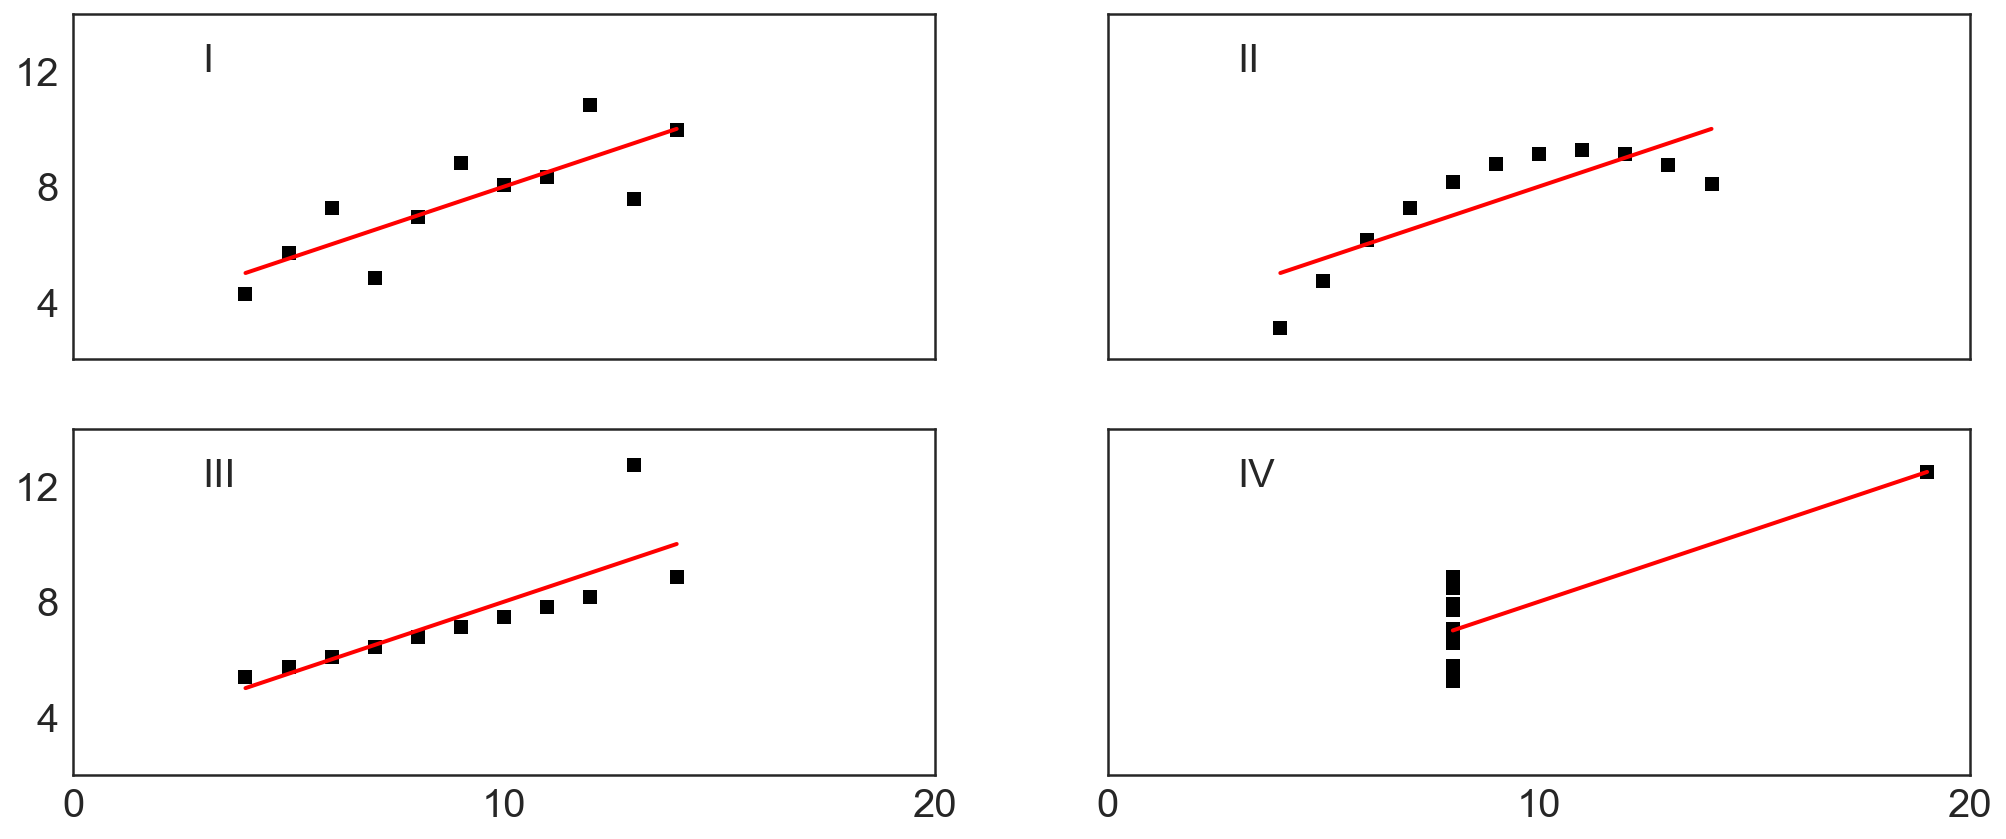

In [46]:
def fit(x):
    return 3 + 0.5 * x

xfit = np.array([np.min(x), np.max(x)])

plt.subplot(221)
plt.plot(x, y1, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), xticklabels=[], yticks=(4, 8, 12), xticks=(0, 10, 20))
plt.text(3, 12, 'I', fontsize=20)

plt.subplot(222)
plt.plot(x, y2, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), xticks=(0, 10, 20), xticklabels=[],
         yticks=(4, 8, 12), yticklabels=[], )
plt.text(3, 12, 'II', fontsize=20)

plt.subplot(223)
plt.plot(x, y3, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.text(3, 12, 'III', fontsize=20)
plt.setp(plt.gca(), yticks=(4, 8, 12), xticks=(0, 10, 20))

plt.subplot(224)
xfit = np.array([np.min(x4), np.max(x4)])
plt.plot(x4, y4, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), yticklabels=[], yticks=(4, 8, 12), xticks=(0, 10, 20))
plt.text(3, 12, 'IV', fontsize=20)

# verify the stats
pairs = (x, y1), (x, y2), (x, y3), (x4, y4)
for x, y in pairs:
    print('mean=%1.2f, std=%1.2f, r=%1.2f' % (np.mean(y), np.std(y),
          np.corrcoef(x, y)[0][1]))

plt.show()

### Draw the Graph (What EDA is all about!)